# WHAT IS A TOPIC MODELLING?

A type of statistical modelling for discovering the abstract "topics" that occur in a collection of documents.
A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words. The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is.

In [114]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trump-tweets/realdonaldtrump.csv
/kaggle/input/trump-tweets/trumptweets.csv


In [115]:
df=pd.read_csv("/kaggle/input/trump-tweets/trumptweets.csv")
df

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [116]:
import nltk

In [117]:
from nltk.corpus import stopwords

In [118]:
import re

In [119]:
from nltk.stem import WordNetLemmatizer 

In [120]:
clean=[]

In [121]:
for i in range(0, 15000):
    review = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"', ' ', df['content'][i])
    review = review.lower()
    review = review.split()
    lm= WordNetLemmatizer() 
    review = [lm.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    clean.append(review)

In [122]:
df['content'][0]

'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!'

In [123]:
clean[0]

'sure tune watch donald trump late night david letterman present top ten list tonight'

# All the contents are cleaned..

In [124]:
df_new=pd.DataFrame(df['content'][0:15000])
df_new

,content
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."
...,...
14995,"W/a newly expanded 27 holes of golfing, Trump ..."
14996,Thank you @ HauteLivingMag for naming @ TrumpD...
14997,"As I predicted, Obama already caught lying on ..."
14998,“Get to know yourself.You can’t improve upon s...


In [125]:
df_new['tweets']=clean

In [126]:
df_new

,content,tweets
0,Be sure to tune in and watch Donald Trump on L...,sure tune watch donald trump late night david ...
1,Donald Trump will be appearing on The View tom...,donald trump appearing view tomorrow morning d...
2,Donald Trump reads Top Ten Financial Tips on L...,donald trump read top ten financial tip late s...
3,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale less...
4,"""My persona will never be that of a wallflower...",persona never wallflower rather build wall cli...
...,...,...
14995,"W/a newly expanded 27 holes of golfing, Trump ...",w newly expanded 27 hole golfing trump intl pa...
14996,Thank you @ HauteLivingMag for naming @ TrumpD...,thank hautelivingmag naming trumpdoral 1 golf ...
14997,"As I predicted, Obama already caught lying on ...",predicted obama already caught lying ocare enr...
14998,“Get to know yourself.You can’t improve upon s...,get know improve upon something understand ask...


In [127]:
from nltk.tokenize import word_tokenize

In [128]:
df_new['tokens']=df_new['tweets'].apply(word_tokenize)

In [129]:
df_new

,content,tweets,tokens
0,Be sure to tune in and watch Donald Trump on L...,sure tune watch donald trump late night david ...,"[sure, tune, watch, donald, trump, late, night..."
1,Donald Trump will be appearing on The View tom...,donald trump appearing view tomorrow morning d...,"[donald, trump, appearing, view, tomorrow, mor..."
2,Donald Trump reads Top Ten Financial Tips on L...,donald trump read top ten financial tip late s...,"[donald, trump, read, top, ten, financial, tip..."
3,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale less...,"[new, blog, post, celebrity, apprentice, final..."
4,"""My persona will never be that of a wallflower...",persona never wallflower rather build wall cli...,"[persona, never, wallflower, rather, build, wa..."
...,...,...,...
14995,"W/a newly expanded 27 holes of golfing, Trump ...",w newly expanded 27 hole golfing trump intl pa...,"[w, newly, expanded, 27, hole, golfing, trump,..."
14996,Thank you @ HauteLivingMag for naming @ TrumpD...,thank hautelivingmag naming trumpdoral 1 golf ...,"[thank, hautelivingmag, naming, trumpdoral, 1,..."
14997,"As I predicted, Obama already caught lying on ...",predicted obama already caught lying ocare enr...,"[predicted, obama, already, caught, lying, oca..."
14998,“Get to know yourself.You can’t improve upon s...,get know improve upon something understand ask...,"[get, know, improve, upon, something, understa..."


In [130]:
df_new['tokens'][90]

['melania',
 'qvc',
 'tomorrow',
 'night',
 '9',
 'p',
 'et',
 'introduce',
 'beautiful',
 'inspiring',
 'melania',
 'timepiece',
 'fashion',
 'jewelry',
 'collection']

In [131]:
from sklearn.feature_extraction.text import CountVectorizer

In [132]:
df_new['tokens'][90]

['melania',
 'qvc',
 'tomorrow',
 'night',
 '9',
 'p',
 'et',
 'introduce',
 'beautiful',
 'inspiring',
 'melania',
 'timepiece',
 'fashion',
 'jewelry',
 'collection']

In [133]:
vect = CountVectorizer().fit(df_new['tokens'][90])
bag_of_words = vect.transform(df_new['tokens'][90])
sum_words = bag_of_words.sum(axis=0) 

In [134]:
sum_words

matrix([[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]], dtype=int64)

# Get most Frequent Words..

In [135]:
def most_freq_words(s, n=None):
    vect = CountVectorizer().fit(s)
    bag_of_words = vect.transform(s)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]

In [136]:
most_freq_words([ word for tweet in df_new.tokens for word in tweet],20)

[('realdonaldtrump', 2933),
 ('great', 1760),
 ('thanks', 1611),
 ('trump', 1552),
 ('obama', 926),
 ('barackobama', 798),
 ('thank', 667),
 ('good', 640),
 ('get', 610),
 ('like', 607),
 ('time', 603),
 ('people', 577),
 ('president', 568),
 ('donald', 555),
 ('would', 555),
 ('cont', 547),
 ('new', 540),
 ('think', 536),
 ('one', 511),
 ('job', 468)]

# Least Frequent Words..

In [137]:
def least_freq_words(s, n=None):
    vect = CountVectorizer().fit(s)
    bag_of_words = vect.transform(s)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=False)
    return freq[:n]

In [138]:
least_freq_words([ word for tweet in df_new.tokens for word in tweet],20)

[('wallflower', 1),
 ('cling', 1),
 ('tara', 1),
 ('conner', 1),
 ('achieves', 1),
 ('trumpative', 1),
 ('barnesandnoble', 1),
 ('precipice', 1),
 ('igoogle', 1),
 ('thoughtful', 1),
 ('fb', 1),
 ('url', 1),
 ('sf', 1),
 ('chronicle', 1),
 ('beckham', 1),
 ('britney', 1),
 ('inexplicable', 1),
 ('randal', 1),
 ('pinkett', 1),
 ('lieutenant', 1)]

In [139]:
df_new['tokens'][1]

['donald',
 'trump',
 'appearing',
 'view',
 'tomorrow',
 'morning',
 'discus',
 'celebrity',
 'apprentice',
 'new',
 'book',
 'think',
 'like',
 'champion']

In [140]:
df_new

,content,tweets,tokens
0,Be sure to tune in and watch Donald Trump on L...,sure tune watch donald trump late night david ...,"[sure, tune, watch, donald, trump, late, night..."
1,Donald Trump will be appearing on The View tom...,donald trump appearing view tomorrow morning d...,"[donald, trump, appearing, view, tomorrow, mor..."
2,Donald Trump reads Top Ten Financial Tips on L...,donald trump read top ten financial tip late s...,"[donald, trump, read, top, ten, financial, tip..."
3,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale less...,"[new, blog, post, celebrity, apprentice, final..."
4,"""My persona will never be that of a wallflower...",persona never wallflower rather build wall cli...,"[persona, never, wallflower, rather, build, wa..."
...,...,...,...
14995,"W/a newly expanded 27 holes of golfing, Trump ...",w newly expanded 27 hole golfing trump intl pa...,"[w, newly, expanded, 27, hole, golfing, trump,..."
14996,Thank you @ HauteLivingMag for naming @ TrumpD...,thank hautelivingmag naming trumpdoral 1 golf ...,"[thank, hautelivingmag, naming, trumpdoral, 1,..."
14997,"As I predicted, Obama already caught lying on ...",predicted obama already caught lying ocare enr...,"[predicted, obama, already, caught, lying, oca..."
14998,“Get to know yourself.You can’t improve upon s...,get know improve upon something understand ask...,"[get, know, improve, upon, something, understa..."


In [141]:
vectorizer = CountVectorizer(min_df=0)# Here "min_df" in the parameter refers to the minimum document frequency and the vectorizer will simply drop all words that occur less than that value set (either integer or in fraction form)
sentence_transform = vectorizer.fit_transform(df_new['tweets'])

In [142]:
sentence_transform

<15000x16145 sparse matrix of type '<class 'numpy.int64'>'
	with 132065 stored elements in Compressed Sparse Row format>

In [143]:
sentence_transform.shape

(15000, 16145)

In [144]:
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))


The vectorized array looks like:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [145]:
from sklearn.decomposition import LatentDirichletAllocation

In [146]:
lda = LatentDirichletAllocation(n_components=8, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
#n_components are the number of topics you want to classify.

In [147]:
lda.fit(sentence_transform)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=8, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [148]:
words=[]

# Arg Sort-->

In [149]:
in_arr = np.array([ 2, 0,  1, 5, 4, 1, 9]) 
print ("Input unsorted array : ", in_arr)  
  
out_arr = np.argsort(in_arr) 
print ("Output sorted array indices : ", out_arr) 
print("Output sorted array in Ascending Order: ", in_arr[out_arr]) 


Input unsorted array :  [2 0 1 5 4 1 9]
Output sorted array indices :  [1 2 5 0 4 3 6]
Output sorted array :  [0 1 1 2 4 5 9]


# Argsort gives the indices in ascending order by default. To make it descending order we have to add [::-1] with the array.

In [161]:
out_arr_new=np.argsort(in_arr)[::-1]
print("Output Sorted Array in Descending Order",in_arr[out_arr_new])

Output Sorted Array in Descending Order [9 5 4 2 1 1 0]


 # Now if we want top 4 numbers in descending order..

In [171]:
out_arr_new=np.argsort(in_arr)[::-1][:4]
print("Output Sorted Array in Descending Order",in_arr[out_arr_new])

Output Sorted Array in Descending Order [9 5 4 2]


In [170]:
out_arr_new=np.argsort(in_arr)[:-4-1:-1]
print("Output Sorted Array in Descending Order",in_arr[out_arr_new])

Output Sorted Array in Descending Order [9 5 4 2]


# This is another way to get top 4 numbers

In [177]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[::-1][:n_top_words]])
        print(message)
        words.append(message)
        print("="*170)

In [178]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic0:trump donald mr via scotland course keep golf happen sugar honor business success hi link dopey lord say as work every aberdeen momentum trumpchicago check vince definitely pick private staff key toure pastor rt breitbartnews allow christian inspired windfarm call

Topic1:realdonaldtrump thanks people true nice best president 2016 man happy luck work lot please agree one tweet birthday really guy office global wish warming help hard awesome trump2016 day bad others name yankee hear thx greatest rt nymag woman inspiration

Topic2:never well vote entrepreneur give team touch enough winning john midas person award build congratulation young robert choice michael together win cover dannyzuker wear matter danny suit usa best gary following word etc rather appreciate africa stated spot effort miss

Topic3:love loser wow syria terrible website hater went home afraid charity speak like model benghazi fun genius comment boston al moron correct 5m act excellent mon

In [179]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]

In [180]:
first_topic

array([0.12501712, 0.12515308, 0.12500415, ..., 0.12500243, 1.03214181,
       0.12500332])

In [181]:
first_topic.shape

(16145,)

In [182]:
second_topic.shape

(16145,)

In [183]:
words[0]

'\nTopic0:trump donald mr via scotland course keep golf happen sugar honor business success hi link dopey lord say as work every aberdeen momentum trumpchicago check vince definitely pick private staff key toure pastor rt breitbartnews allow christian inspired windfarm call'

In [184]:
from wordcloud import WordCloud 

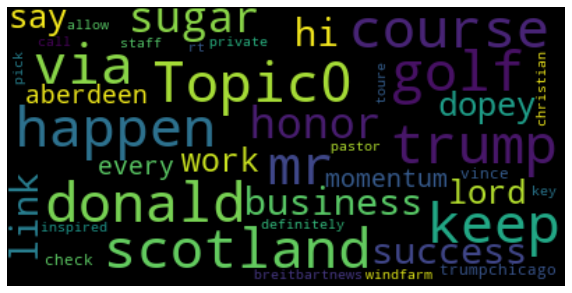

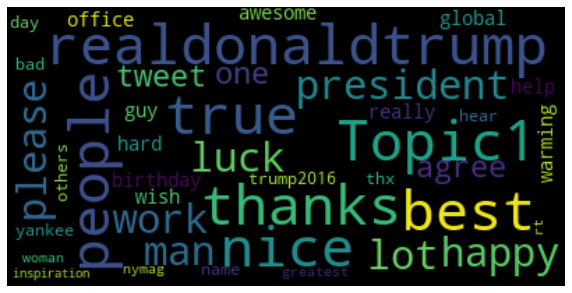

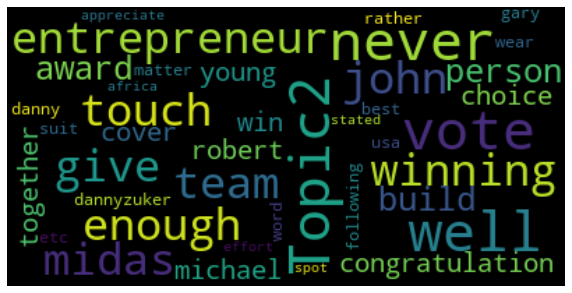

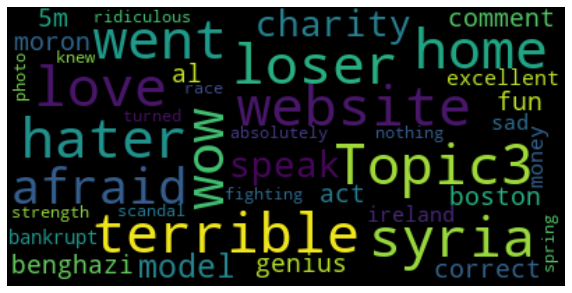

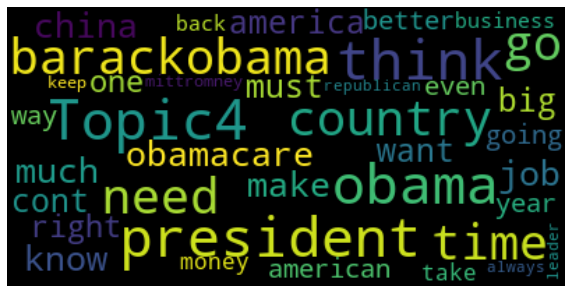

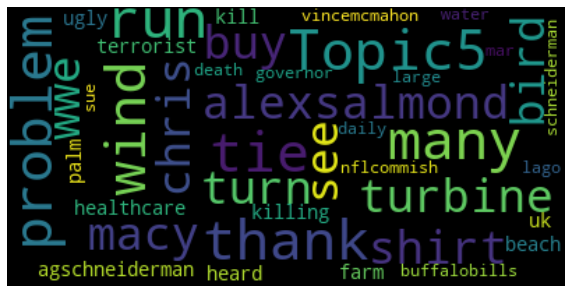

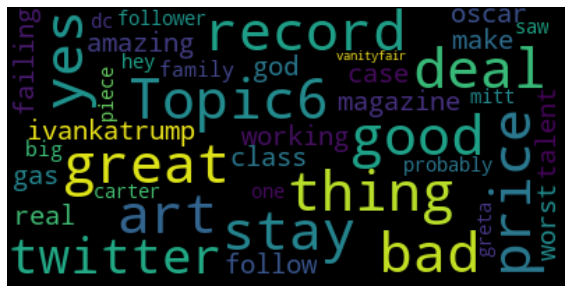

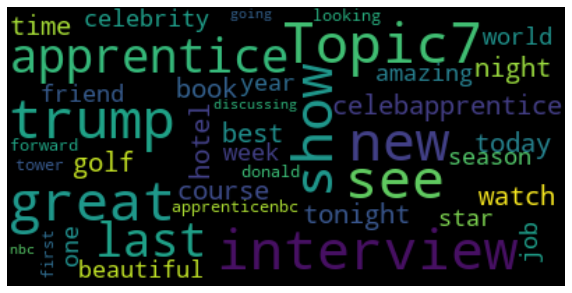

In [185]:
for i in range(0,8):
    wordcloud = WordCloud(max_font_size=40, max_words=40).generate(words[i])

# Display the generated image:
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()